In [3]:
#!pip install umap-learn
!pip install umap-learn

In [4]:
import os
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'
import pickle
import numpy as np
import umap
import matplotlib.pyplot as plt
import umap.umap_ as umap

In [5]:
filename = 'glove_6B/glove2word2vec_model.sav'
with open(filename, 'rb') as file:
    model = pickle.load(file)

# Extract word vectors from the model
word_vectors = model

In [82]:

import csv

# Path to your CSV file
csv_test = "label.csv"
words = ""
addedlist = []  

# Open the CSV file for reading
with open(csv_test, mode='r', newline='', encoding='utf-8') as file:
    reader = csv.reader(file)

    # Skip the header row
    next(reader, None)

    # Iterate over each row in the CSV file
    for row in reader:
        cluster_number = row[0]  # First element in the row is the cluster number
        labels = row[1]  # second element in the row is the labels number
        words += (labels + ", ")
        
addedlist = words.split(', ')
seen = set()
unique_list = [x for x in addedlist if not (x in seen or seen.add(x))]
unique_list = unique_list[:len(unique_list)-1]
print(unique_list)
words_of_interest = unique_list
words_of_interest.remove("no person")
print(words_of_interest)


print(len(words_of_interest))


['evening', 'no person', 'composure', 'vacation', 'travel', 'water', 'sea', 'relaxation', 'bikini', 'landscape', 'island', 'beach', 'summer', 'sun', 'sunset', 'lifestyle', 'surfboarding', 'sky', 'tropical', 'nature', 'sand', 'leisure', 'surf', 'seascape', 'ocean', 'seashore', 'dawn', 'hot', 'people', 'turquoise', 'sport', 'fun', 'fair weather', 'recreation', 'dune', 'desert', 'bay', 'child', 'wave', 'freedom', 'dusk', 'pet', 'wind', 'love', 'idyllic', 'girl', 'flying', 'cloud', 'storm', 'photograph', 'lake', 'silhouette', 'couple', 'Heaven']
['evening', 'composure', 'vacation', 'travel', 'water', 'sea', 'relaxation', 'bikini', 'landscape', 'island', 'beach', 'summer', 'sun', 'sunset', 'lifestyle', 'surfboarding', 'sky', 'tropical', 'nature', 'sand', 'leisure', 'surf', 'seascape', 'ocean', 'seashore', 'dawn', 'hot', 'people', 'turquoise', 'sport', 'fun', 'fair weather', 'recreation', 'dune', 'desert', 'bay', 'child', 'wave', 'freedom', 'dusk', 'pet', 'wind', 'love', 'idyllic', 'girl', '

In [99]:
from sklearn.metrics.pairwise import cosine_similarity

#words_of_interest = ['hello','there','evening']


words_of_interest = ['evening', 'composure', 'vacation', 'travel', 'water', 'sea', 'relaxation', 'bikini', 'landscape', 'island', 'beach', 'summer', 'sun', 'sunset', 'lifestyle', 'surfboarding', 'sky', 'tropical', 'nature', 'sand', 'leisure', 'surf', 'seascape', 'ocean', 'seashore', 'dawn', 'hot', 'people', 'turquoise', 'sport', 'fun', 'fair weather', 'recreation', 'dune', 'desert', 'bay', 'child', 'wave', 'freedom', 'dusk', 'pet', 'wind', 'love', 'idyllic', 'girl', 'flying', 'cloud', 'storm', 'photograph', 'lake', 'silhouette', 'couple', 'Heaven']
for target_word in words_of_interest[:30]:
    if target_word in model.key_to_index:
        # Get the vector for the target word
        target_vector = model[target_word].reshape(1, -1)

        # Calculate cosine similarities between the target word and all other words
        similarities = cosine_similarity(target_vector, model.vectors)

        # Find the top N similar words (excluding the target word itself)
        top_n = 10  # Adjust as needed
        similar_word_indices = similarities.argsort()[0][-top_n - 1:-1][::-1]

        # Get the similar words and their similarity scores
        similar_words = [model.index_to_key[i] for i in similar_word_indices]
        #similarity_scores = [similarities[0][i] for i in similar_word_indices]
        words_of_interest.extend(similar_words)

        # Print the similar words and their similarity scores
        #for word, score in zip(similar_words, similarity_scores):
        #    print(f"{word}: {score:.4f}")
    
    else:
        print(f"{target_word} is not in the vocabulary.")
        

seen = set()
unique_list = [x for x in words_of_interest if not (x in seen or seen.add(x))]
unique_list = unique_list[:len(unique_list)-1]

print(unique_list)

words_of_interest = [word for word in unique_list if word in model.key_to_index]
vectors_of_interest = [model[word] for word in words_of_interest]

print(len(words_of_interest))  # Should now be equal to len(vectors_of_interest)
print(len(vectors_of_interest))

surfboarding is not in the vocabulary.
['evening', 'composure', 'vacation', 'travel', 'water', 'sea', 'relaxation', 'bikini', 'landscape', 'island', 'beach', 'summer', 'sun', 'sunset', 'lifestyle', 'surfboarding', 'sky', 'tropical', 'nature', 'sand', 'leisure', 'surf', 'seascape', 'ocean', 'seashore', 'dawn', 'hot', 'people', 'turquoise', 'sport', 'fun', 'fair weather', 'recreation', 'dune', 'desert', 'bay', 'child', 'wave', 'freedom', 'dusk', 'pet', 'wind', 'love', 'idyllic', 'girl', 'flying', 'cloud', 'storm', 'photograph', 'lake', 'silhouette', 'couple', 'Heaven', 'morning', 'afternoon', 'night', 'saturday', 'sunday', 'weekend', 'day', 'midnight', 'hours', 'friday', 'poise', 'stamina', 'regained', 'toughness', 'tenacity', 'sharpness', 'regaining', 'regain', 'patience', 'steadiness', 'vacations', 'honeymoon', 'trips', 'trip', 'holiday', 'weekends', 'holidays', 'resort', 'travelers', 'traveling', 'flights', 'destinations', 'destination', 'visit', 'business', 'natural', 'dry', 'salt', 

In [100]:


if not vectors_of_interest:
    print("No valid word vectors found. Please check your input data.")
else:
    reducer = umap.UMAP(n_neighbors=150)
    umap_embeddings = reducer.fit_transform(vectors_of_interest)
    
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

# Assuming you have loaded GloVe embeddings and vectors_of_interest
# vectors_of_interest is a list of word vectors

# Number of clusters (you can adjust this)
num_clusters = 20

# Normalize the word vectors (important for K-Means)
normalized_vectors = normalize(vectors_of_interest)

# Initialize and fit K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(normalized_vectors)

# Get the cluster labels for each word vector
cluster_labels = kmeans.labels_

# Print the words and their respective clusters
#for word, cluster in zip(words_of_interest, cluster_labels):
#    print(f"{word}: Cluster {cluster}")

# Analyze and visualize the clusters as needed


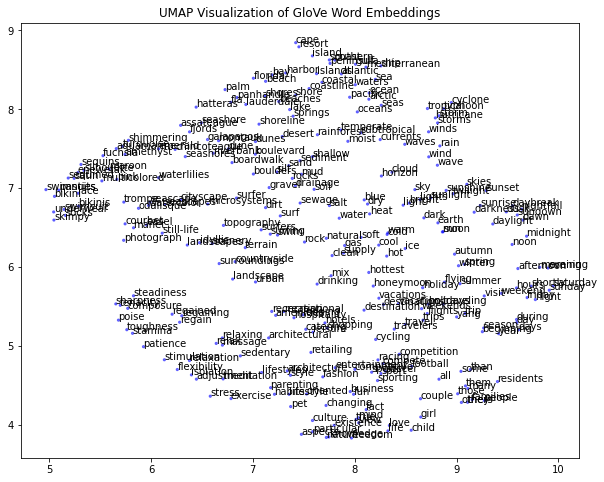

In [101]:

def drawPlt(umap_embeddings, words_of_interest, highlight_words=None):
    # Create a scatter plot of the UMAP embeddings
    plt.figure(figsize=(10, 8))
    
    # Initialize colors for all points as blue
    point_colors = ['blue'] * len(words_of_interest)
    
    # Change the color for highlighted words to red
    if highlight_words:
        for i, word in enumerate(words_of_interest):
            if word in highlight_words:
                point_colors[i] = 'red'
    
    # Scatter plot all words with smaller circles and updated colors
    plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], marker='.', s=20, c=point_colors, alpha=0.5)
    
    # Annotate points with words
    for i, word in enumerate(words_of_interest):
        if i < umap_embeddings.shape[0]:  # Check if the index is within bounds
            plt.annotate(word, (umap_embeddings[i, 0], umap_embeddings[i, 1]), fontsize=10)
    
    plt.title("UMAP Visualization of GloVe Word Embeddings")
    plt.xlabel("")
    plt.ylabel("")
    plt.show()

drawPlt(umap_embeddings,words_of_interest)

In [94]:
print(len(vectors_of_interest))
print(umap_embeddings[0])

340
[-1.0800881 17.47438  ]


In [103]:
import matplotlib.pyplot as plt
import umap
import numpy as np

def drawPlt(umap_embeddings, selected_keywords,words_of_interest, target_word, cluster_labels, focus_cluster=None, opacity=0.5, label_opacity=1.0, label_size=12):
    # Create a scatter plot of UMAP embeddings
    plt.figure(figsize=(12, 8))

    # Define unique colors for each cluster
    unique_clusters = set(cluster_labels)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

    # Lists to store cluster labels
    cluster_label_lists = [[] for _ in range(len(unique_clusters))]

    # Plot points in focus cluster with full opacity
    for cluster in unique_clusters:
        mask = cluster_labels == cluster
        
        plt.scatter(
            umap_embeddings[mask, 0], umap_embeddings[mask, 1],
            color=colors[cluster], alpha=opacity
        )
        label_alpha = label_opacity  # Adjusted opacity for labels of other clusters
        label_size_cluster = 8  # Smaller label size for other clusters

        # Annotate points with words and set label opacity and size
        #for i, word in enumerate(words_of_interest):
        #    if cluster_labels[i] == cluster:
        #        plt.annotate(word, (umap_embeddings[i, 0], umap_embeddings[i, 1]), alpha=label_alpha, fontsize=label_size_cluster)
        #        cluster_label_lists[cluster].append(word)

        


    # Annotate points with words
    for i, word in enumerate(words_of_interest):
        if(i == len(umap_embeddings)):
            break
        if word in selected_keywords:
            # Enlarge the text for selected keywords
            plt.annotate(word, (umap_embeddings[i, 0], umap_embeddings[i, 1]), alpha=1, fontsize=12)
        else:
            # Use normal text size for other keywords
            plt.annotate(word, (umap_embeddings[i, 0], umap_embeddings[i, 1]), alpha=label_opacity, fontsize=8)


                
                
    #plt.title("UMAP Visualization of GloVe Word Embeddings")
    #plt.xlabel("UMAP Dimension 1")
    #plt.ylabel("UMAP Dimension 2")
    plt.axis('off')

    #plt.legend()

    
    image_folder = "cluster_images_new"
    os.makedirs(image_folder, exist_ok=True)
    plt.savefig(f"{image_folder}/cluster_visualization_{focus_cluster}.png", dpi=300, bbox_inches='tight', format='png')
  
    # Show the plot
    
    # Optionally, you can specify the DPI (dots per inch) for resolution, and the format (e.g., PNG, JPEG, SVG)
    #plt.savefig('my_high_res_plot.png', dpi=300, format='png')

    #plt.show()

    # Return the cluster label lists
    return cluster_label_lists




In [96]:

import openai
import api_key
# Setting up enviornment
from base64 import b64decode
from pathlib import Path
import os
import io
import warnings
from PIL import Image


def chatGPT_ads(input_text):

    openai.api_key = api_key.openai_key()
    response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            temperature = 1.2,
            messages=[
                {"role": "system", "content": 
                '''
                you are a travel agency, that has the ability to write fantastic advertisements based on some fake locations

                I want you to write me SHORT describtion, give briefly. based on the keyword given.
                
               '''
                },

                #{"role": "user", "content": " A photorealistic, Spectacular nature landscape, highly detailed, photo-postcard of the coast, including mountain, landscape, river, waterfall "},
                #{"role": "assistant", "content":"Spectacular nature landscape, background mountains, river with waterfall, sharp focus, hyper detailed, detail colors, haze, fog, pine trees, depth, soft contrast,  golden hour colors, photo realistic, ultra realistic, cinematic landscape photography, cinematic ligthining"},
                {"role": "user", "content": 
             '''IDEA: short describtion based on the following text''' + input_text +"NO CANVAS"}
            ]
    )
    #print(response['choices'][0]['message']['content'])
    output = response['choices'][0]['message']['content']
    return output
    #os.system("say -v anna '"+output+"'") 
    #os.system("say '"+output+"'") 


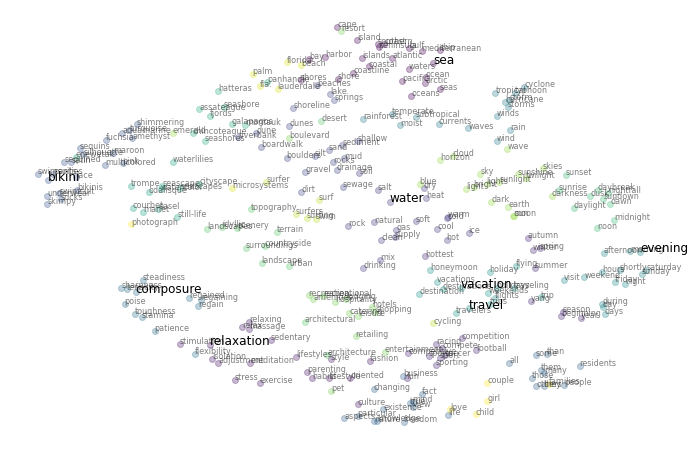

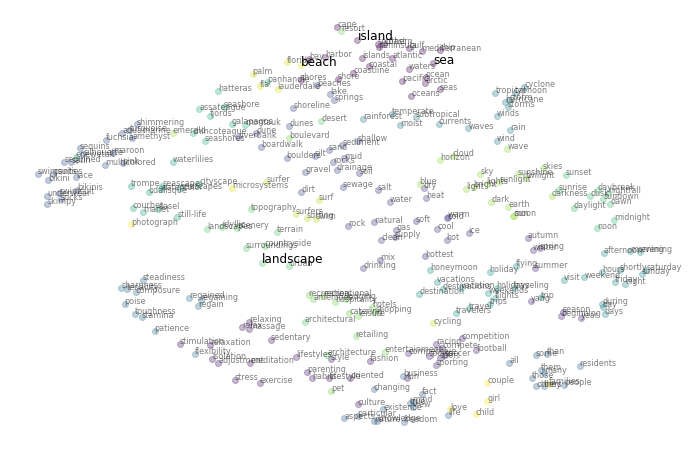

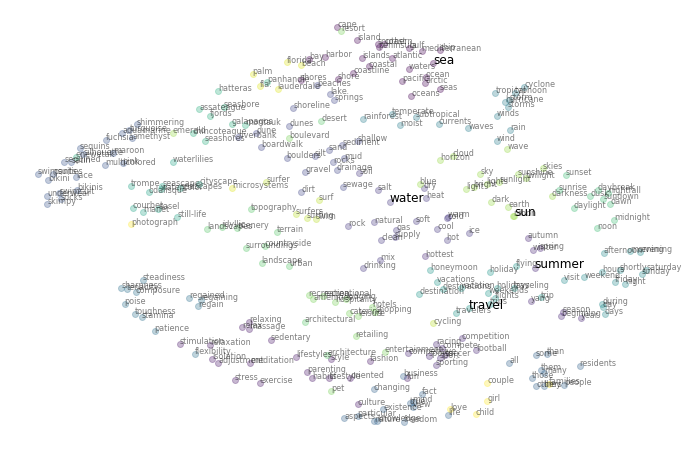

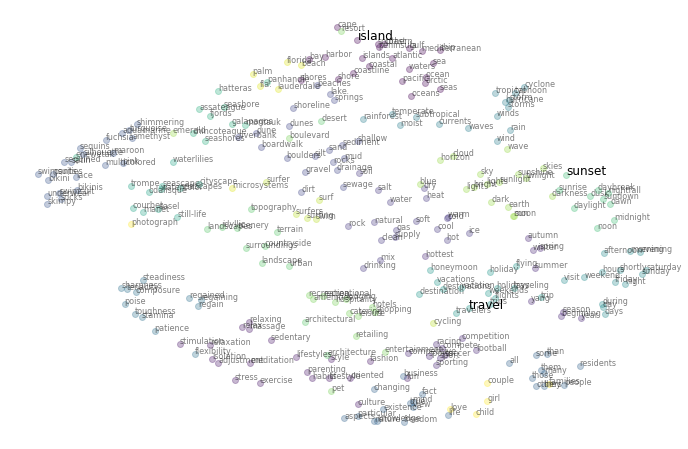

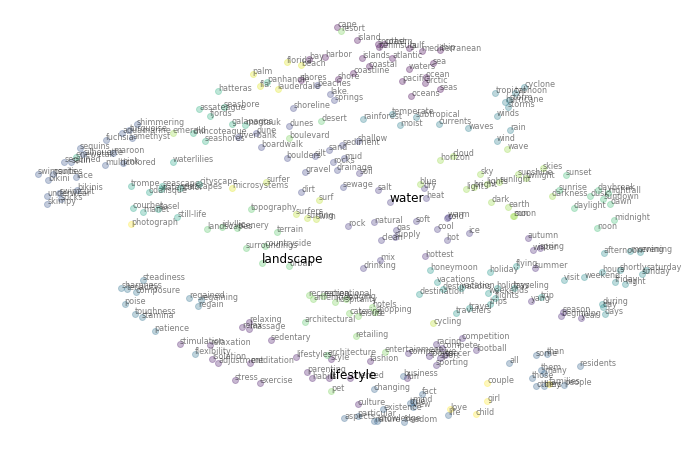

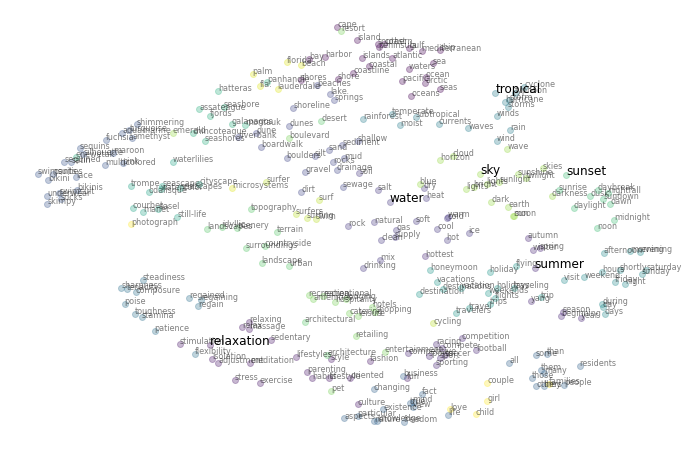

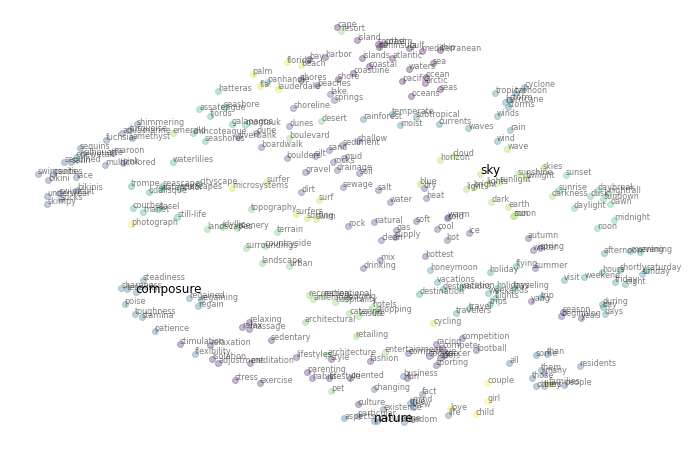

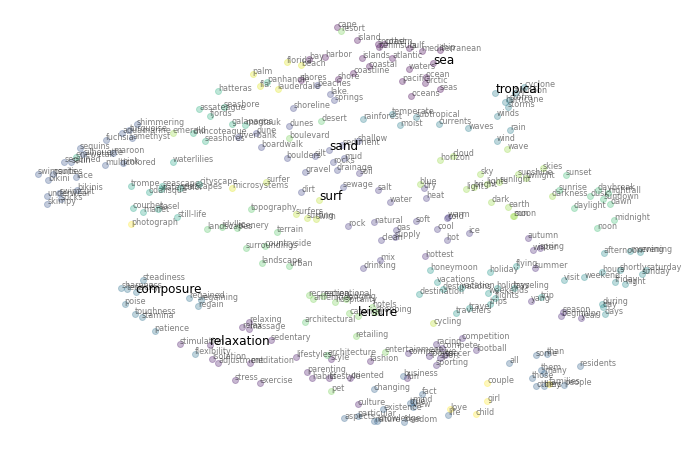

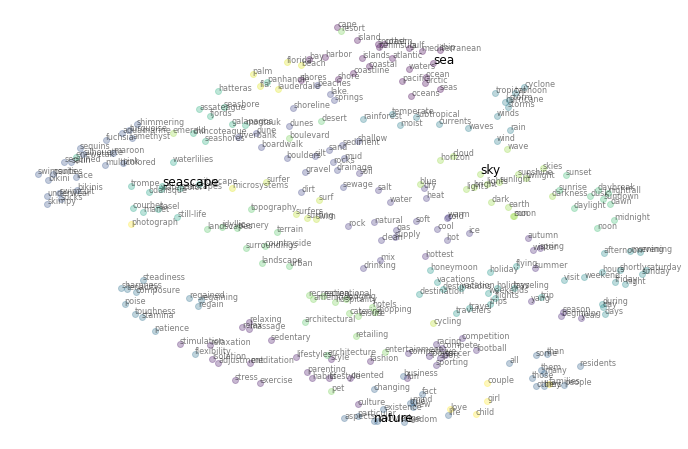

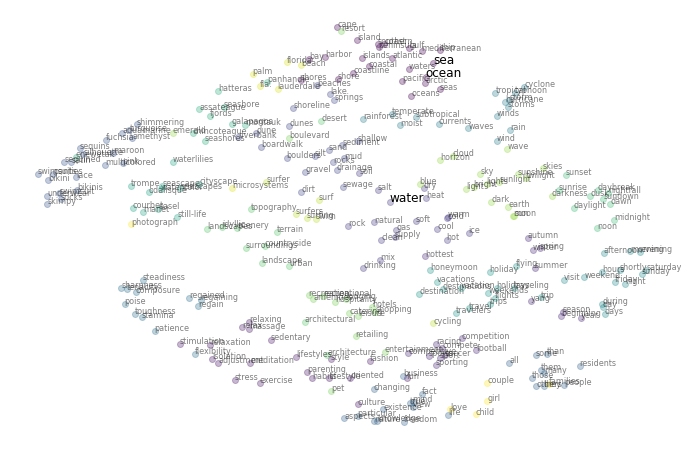

In [104]:
  
import csv

# Path to your CSV file
csv_test = "label.csv"
words = ""
addedlist = []  
cluster_label_lists = []
all_labels = []
# Open the CSV file for reading
with open(csv_test, mode='r', newline='', encoding='utf-8') as file:
    reader = csv.reader(file)

    # Skip the header row
    next(reader, None)
    i = 0
    # Iterate over each row in the CSV file
    for row in reader:
        cluster_number = row[0]  # First element in the row is the cluster number
        labels = row[1]  # second element in the row is the labels number
        if(i < 10):
            selected_keywords = labels.split(', ')
            cluster_label_lists.append(selected_keywords)
        
        
            this = drawPlt(umap_embeddings, selected_keywords,words_of_interest, target_word, cluster_labels, focus_cluster=i, opacity=0.3, label_opacity=0.5, label_size=14)
            # Collect label data
            for cluster, labels in enumerate(cluster_label_lists):
                for label in labels:
                    all_labels.append([cluster, label])
        i += 1
        #print(labels)
        #print(labels.split(', '))
